### Importing the package

First, make sure you have installed the `hydroponics` package and the necessary dependencies. If not look at the instructions in the `README`

Then import the `hydroponics` package by running

In [10]:
import hydroponics as hp

### Start using solutions

This package uses dictionnaries to store the composition of a solution or the required nutriments of a plant. 
In general, the functions require `dict`where the keys are the name of an ion or salt and the values are the concentration in $[g/L]$. One can convert g/L to mol/L and vice-versa (see below). Some functions also accept input in both mass and molar concentrations.

In [2]:
concentration1 = 0.5 #g/L
concentration2 = 2 #g/L
solution_name = {"salt1": concentration1, "salt2": concentration2}

One can also directly generate solutions from an excel file. Use the `import_solution_data` or `import_plant_data` functions for this. 

In the UserData.xls file, fill in the *My Solution* sheet with the composition of the solution, then use the following code to initialse the solution dict. The same can be done for a plant dict.

In [84]:
solution_name = "Example_solution"
#modify the excel file if needed

first_solution_dict = hp.import_solution_data(solution_name)
print(first_solution_dict)

**Nice !** Now that we have seen how to create solutions, lets use them to do some chemistry.

For instance, if you want to make a solution for your plant that has certain concentration of different ions, the `make_solution` can indicate which salts and which quantities to add to the solution.

For instance, the optimal solution for my plant is*:
| Ion   | Concentration [g/L] |
| ------| --------------|
| NH4+   | 0.018 |
| Ca(2+)   | 0.09 |
| NO3(-)   | 0.728 |
| Mg(2+)   | 0.036 |
| SO4(2-)   | 0.108 |



I want a 5 L solution and I don't want Cl- and Br- ions in the solution because these might be toxic for the plant. 
Then I can find how much of different salts I have to weigh and add to the solution to get the desired concentrations of the ions.

*note that you can give this in in the excel file and make the dict by using `import_solution_data`.

In this case this would be:

In [83]:
volume = 5 #L
nono_ions =  ["Br-"]
solution = {"NH4+":0.018, "Ca(2+)": 0.09, "NO3(-)": 0.728, "SO4(2-)": 0.108, "Mg(2+)": 0.036}
#alternative use hp.import_solution_data(solution_name) to get the solution dictionary

salts_masses = hp.make_solution(solution, nono_ions, volume)
print(salts_masses) #g


If you want to check if a solution is soluble, you can use `check_solubility` to do so.

You can either provide a dict of *salts* or a dict of *ions* ans input.
The output is either a bool (<span style="color:green">True</span> if soluble and <span style="color:red">False</span> if a salt precipitates), or an analysis of the salts that precipitate.


In [82]:
#create a more concentrated and diluted version of the solution of before.
concentrated_sol = {ion : conc*10000 for ion, conc in solution.items()} #concentrate by 10'000x
diluted_sol = {ion : conc/2 for ion, conc in solution.items()} #dilute by 2x

#Check the solubility of the solution

print(f"For the concentrated solution: {hp.check_solubility(concentrated_sol, input_type="ion", output_type="analysis")}")
print(f"For the diluted solution: {hp.check_solubility(diluted_sol, input_type="ion", output_type="analysis")}")

In order to visualise the evolution of the concentration of the ions in the solution as the plant grows, one can use the `plot_graph` method to generate a figure. Try the version with the more *needy* plant to visualise a solution that ran out of a certain nutriment.

Using the example from before and a dict for the plant one can obtain: 

In [56]:
plant = {"NH4+": 0.05, "Ca(2+)": 0.3, "NO3(-)": 0.9, "SO4(2-)": 0.03, "Mg(2+)": 0.15}
needy_plant = {"NH4+": 0.08, "Ca(2+)": 0.3, "NO3(-)": 0.8, "SO4(2-)": 0.03, "Mg(2+)": 0.2}

growth_time = 30 #days
ions_of_interest = ["NH4+", "Ca(2+)", "Mg(2+)"]

hp.plot_graph(solution, "ion", plant, growth_time, volume, ions_of_interest) #try with needy_plant instead of plant


### pH calculations

**Whouhouuuuu**

Next, one can determine the pH of the solution with `pH_approximation` which can help ensure the solution is at the right pH for the plant.
See the short example below:

In [64]:
temperature = 25 #°C
pH = hp.pH_approximation(solution, temperature)
print(f"The pH of the solution is {pH}")

### Simulation report

Finally, ona can generate a PDF report with the `generate_report` function.

Providing information about the solution, the plant, the growth time, and the ions we want to analyse,
a PDF is generated with a short analysis and helpful graphs. You'll find the PDF in the current directory!

Generating report...
Simulating the plant growth...
Report generated successfully!


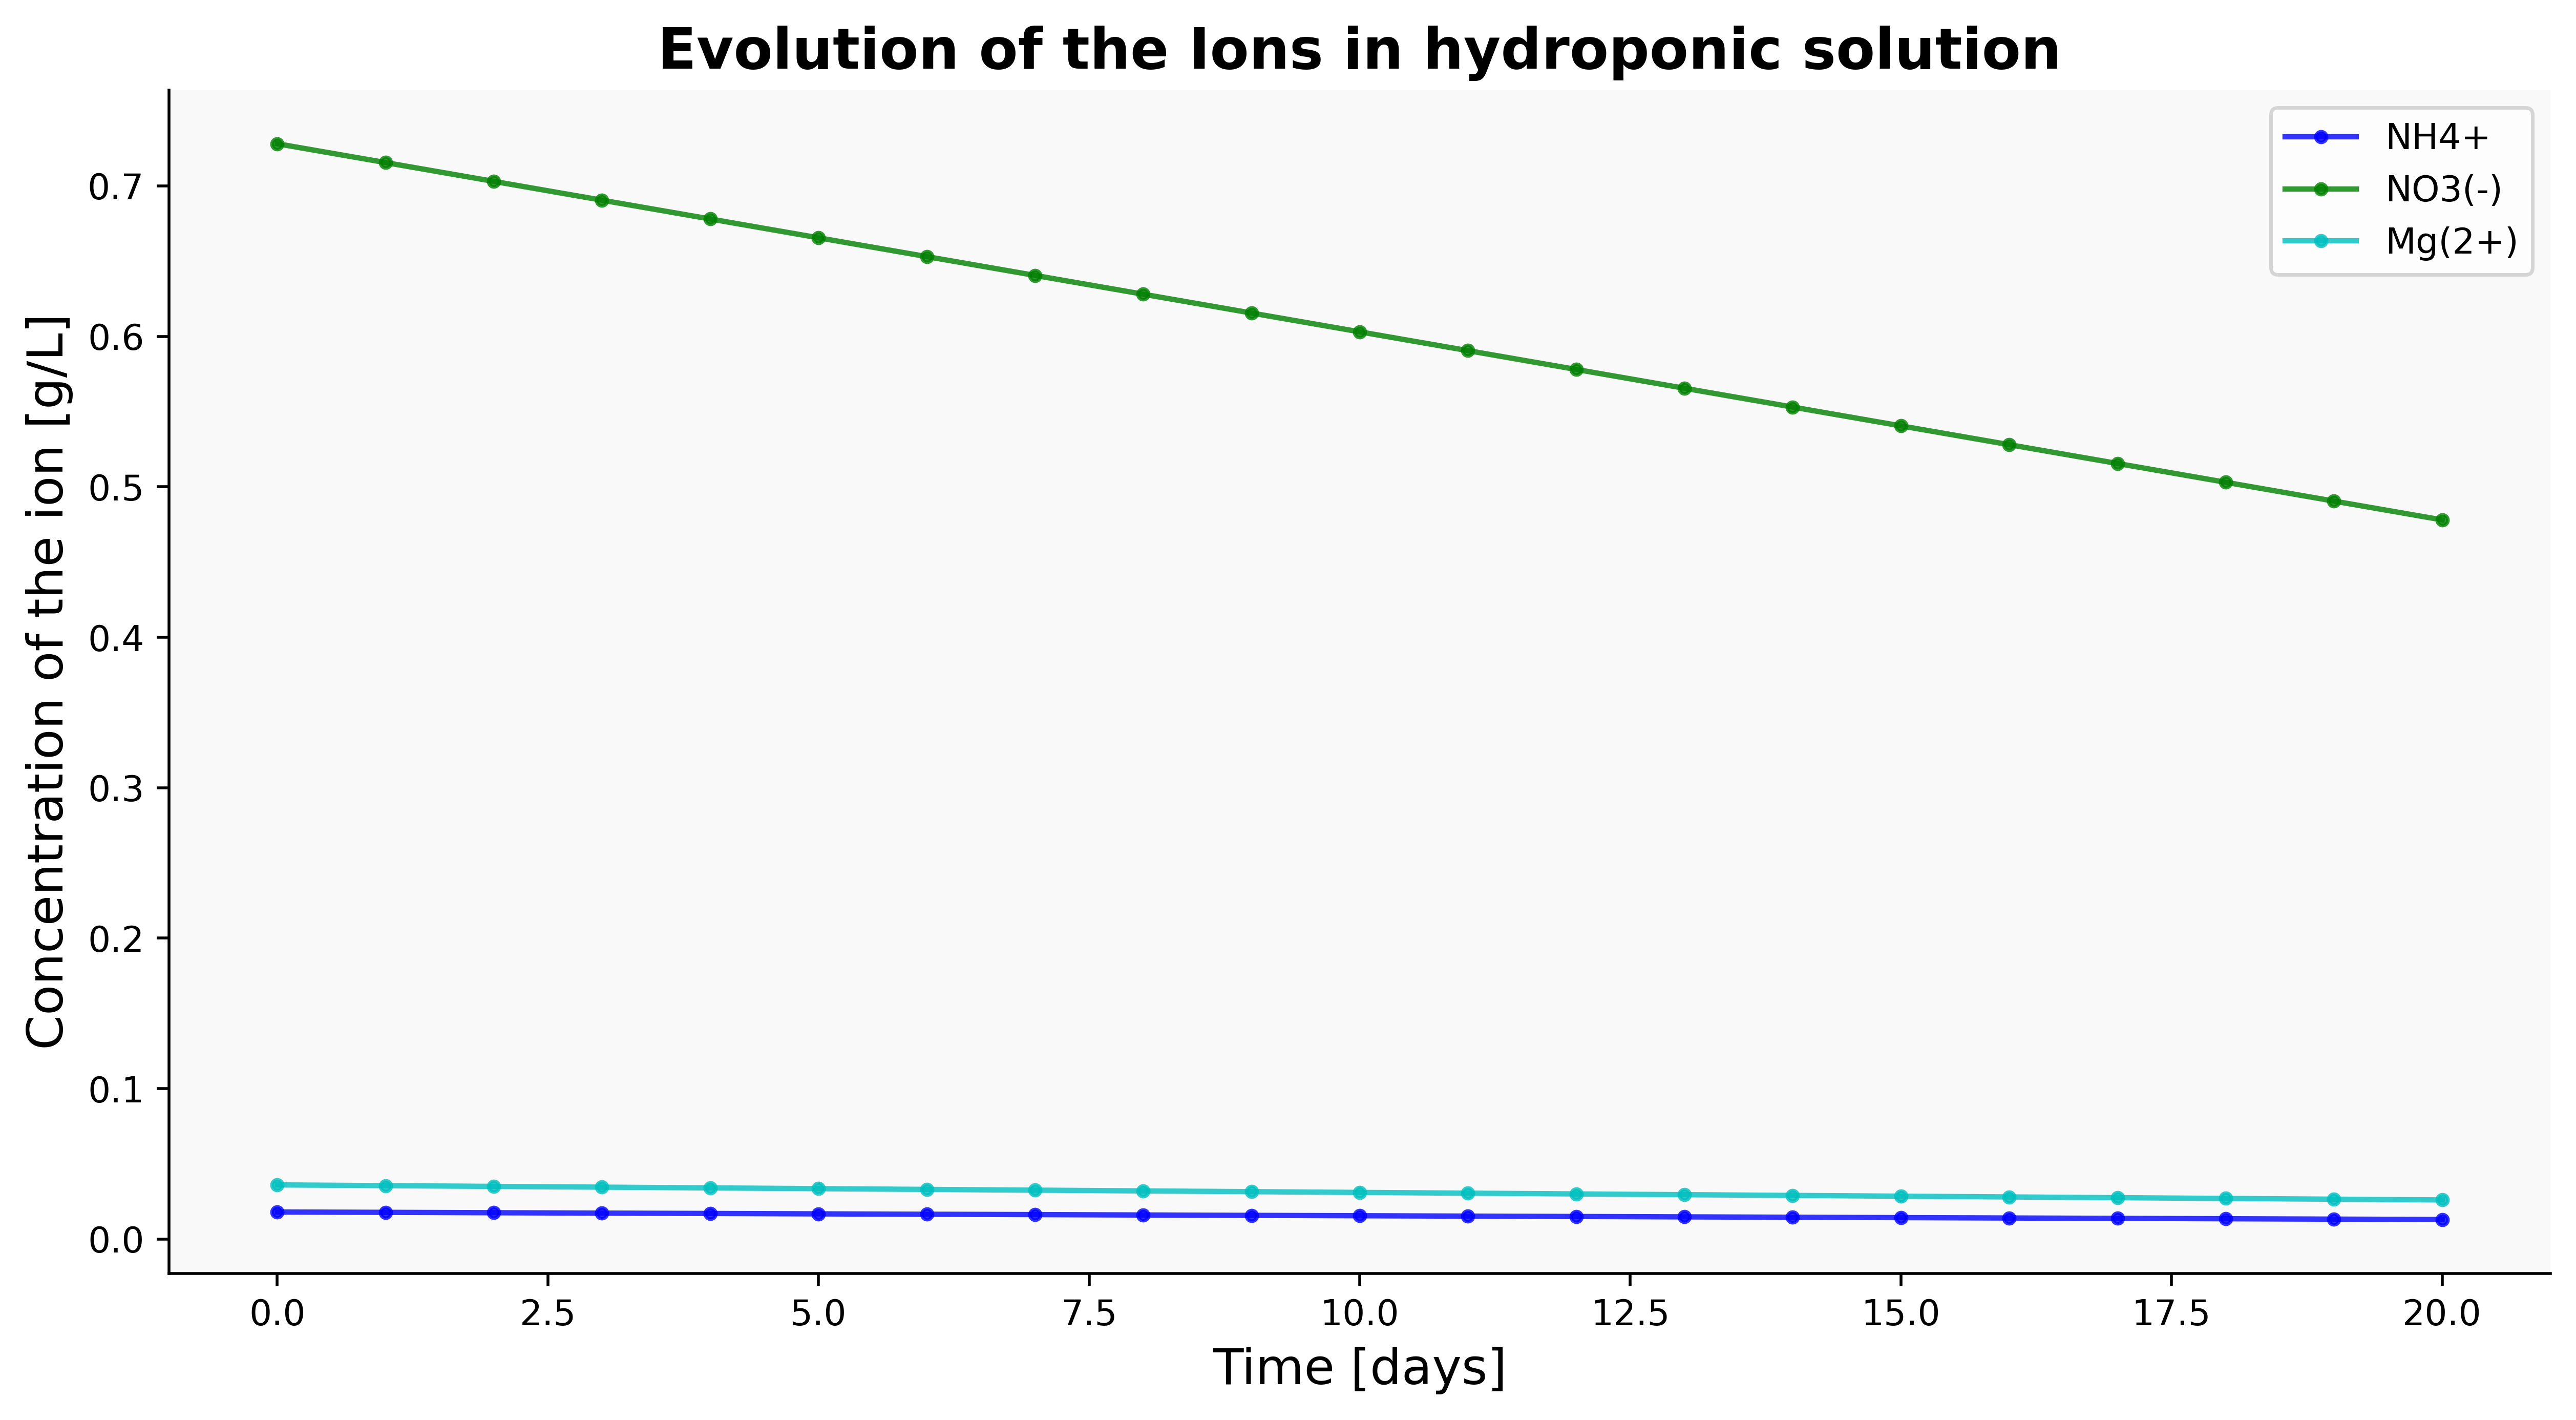

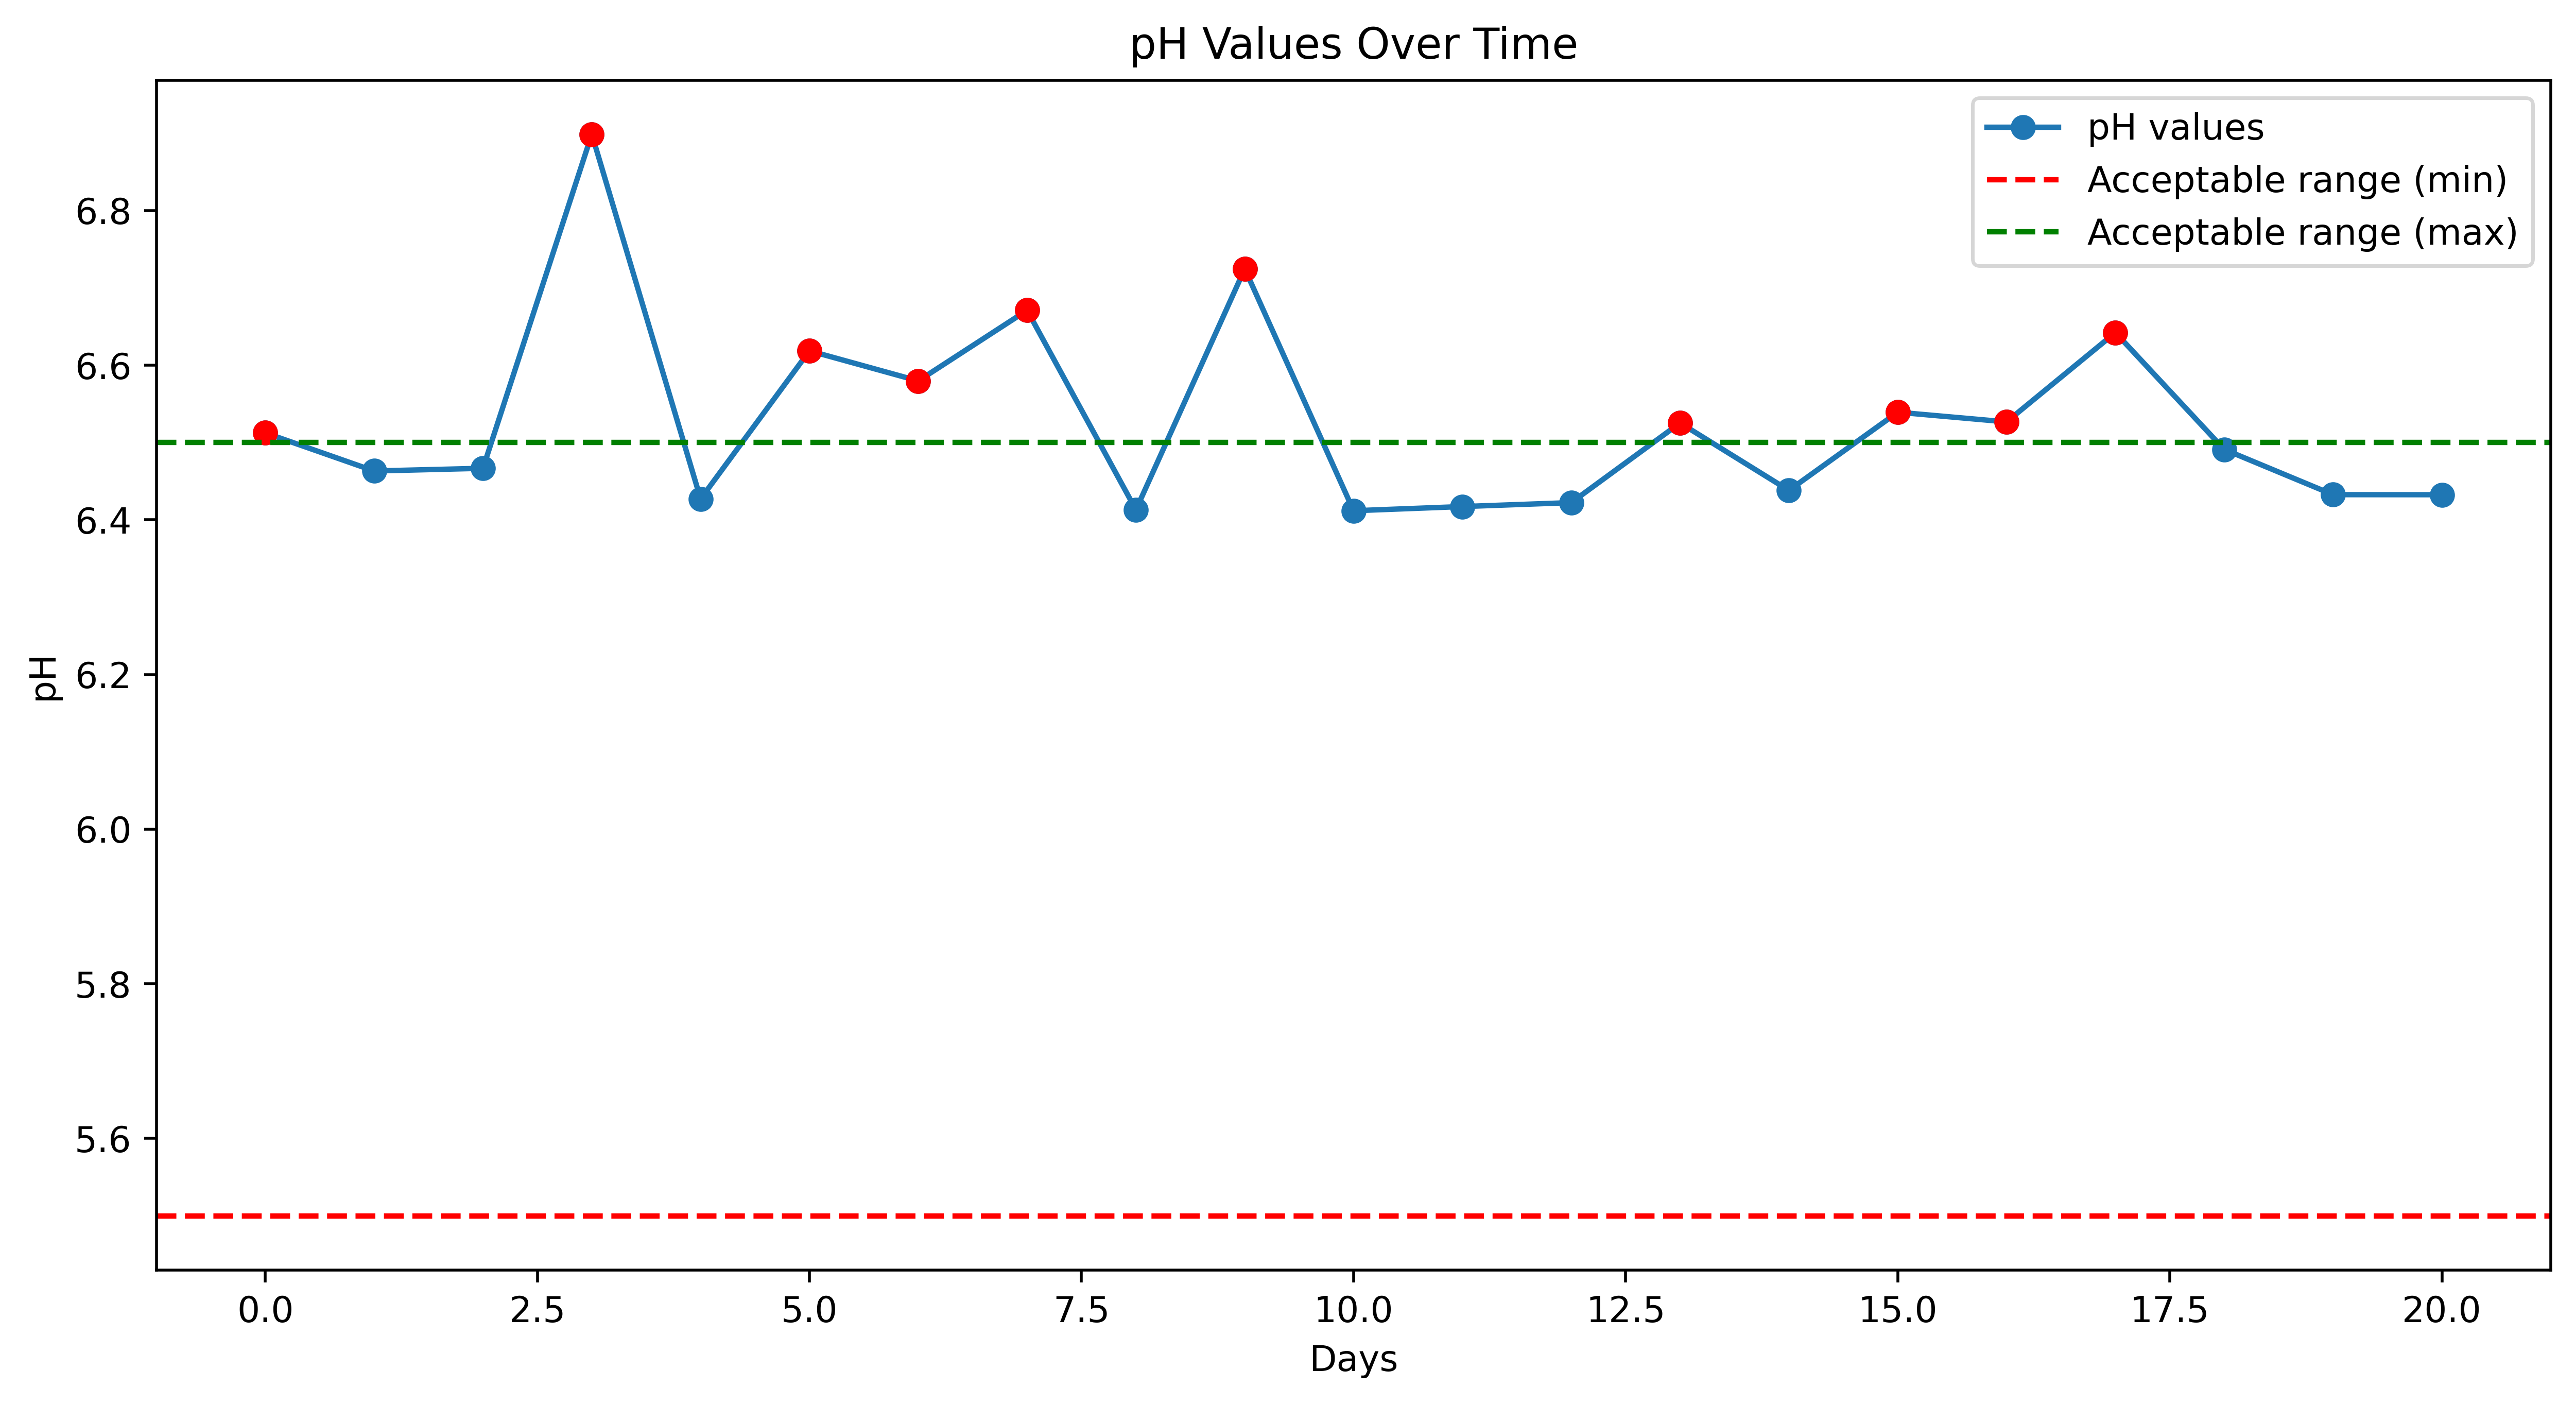

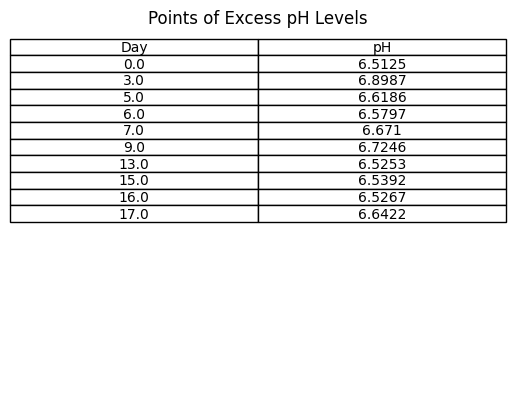

In [81]:
plant_name = "Bell pepper"
required_nutriments = {"NH4+": 0.01, "NO3(-)": 0.5, "Mg(2+)": 0.02}
solution = {"NH4+":0.018, "Ca(2+)": 0.09, "NO3(-)": 0.728, "SO4(2-)": 0.108, "Mg(2+)": 0.036}
analysed_ions = ["NH4+", "NO3(-)", "Mg(2+)"]
volume = 2 #L
growth_time = 20 #days
forbidden_ions = ["Cl-"]

hp.generate_report(plant_name, required_nutriments, growth_time, analysed_ions, solution, volume, forbidden_ions = forbidden_ions)

**Noice !**

Thank you very much for reading this tutorial till the end. You are certainly ready not to use this package to its full potential.

Good luck with your future hydroponic endeavors,

*Nils* and *Mathieu*